<a href="https://colab.research.google.com/github/sseydaltin/makine/blob/main/polinomsal_regresyon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  POLİNOMSAL REGRESYON (Insurance Dataset)

**VERİSETİNİ TANIYALIM**

Bu veri seti, bireylerin sağlık sigortası için ödedikleri primleri ve bu primleri etkileyen demografik, sağlık ve bölgesel faktörleri içermektedir. Veri seti, sigorta şirketlerinin müşteri profillerini anlamalarına ve doğru fiyatlandırma stratejileri geliştirmelerine yardımcı olmak amacıyla oluşturulmuştur. Aynı zamanda bireylerin sigorta primlerini hangi faktörlerin artırdığı veya azalttığı hakkında bilgi edinmelerine olanak tanır.

Veri Setinin Amacı:

•
Sağlık sigortası primlerini tahmin etmek.

•
Sigorta primlerini etkileyen en önemli faktörleri belirlemek.

•
Risk analizi yaparak farklı müşteri gruplarını değerlendirmek.

**Veri Setinin Amacı:**
- Sağlık sigortası primlerini tahmin etmek.
- Sigorta primlerini etkileyen en önemli faktörleri belirlemek.
- Risk analizi yaparak farklı müşteri gruplarını değerlendirmek.

**Veri Setindeki Değişkenler:**
1. **Age (Yaş):** Sigorta yaptıran kişinin yaşı. Yaş arttıkça sağlık riskleri de artar.
2. **Sex (Cinsiyet):** Sigorta yaptıranın cinsiyeti (erkek/kadın).
3. **BMI (Vücut Kitle İndeksi):** Kişinin kilo ve boyuna göre hesaplanan sağlık göstergesi.
4. **Children (Çocuk Sayısı):** Sigorta kapsamındaki çocuk sayısı.
5. **Smoker (Sigara Kullanımı):** Sigara içip içmediği bilgisi. Sigara içmek, sağlık risklerini ciddi şekilde artırır.
6. **Region (Bölge):** Kişinin yaşadığı coğrafi bölge (northeast, northwest, southeast, southwest).
7. **Charges (Sigorta Ücreti):** Sağlık sigortası için ödenen prim miktarı (hedef değişken).

**Kullanım Alanları:**
- **Sigorta Şirketleri:** Yeni müşteriler için prim tahmini yaparak doğru fiyatlandırma stratejileri geliştirmek.
- **Bireyler:** Sağlık davranışlarının (örneğin, sigara kullanımı veya BMI kontrolü) prim üzerindeki etkisini anlamak.

Bu veri seti, hem sağlık sigortası alanında stratejik kararlar almak için hem de veri analizi ve makine öğrenmesi projeleri için bir kaynak sunar.

### **1. Veri Setinin Keşfi ve Hazırlığı**

1. Veri Setini Yükleme ve İlk İnceleme

In [1]:
import pandas as pd

# Veri setini yükle
df = pd.read_csv("/content/insurance.csv")

# İlk 5 satıra göz at
print(df.head())

# Veri tipi bilgileri ve eksik değer kontrolü
print(df.info())

# Temel istatistikler
print(df.describe())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

 2. Kategorik ve Sayısal Değişkenleri Belirleme

In [2]:
# Sayısal değişkenler
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Sayısal Değişkenler:", numerical_cols)

# Kategorik değişkenler
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Kategorik Değişkenler:", categorical_cols)


Sayısal Değişkenler: ['age', 'bmi', 'children', 'charges']
Kategorik Değişkenler: ['sex', 'smoker', 'region']


 3. Sayısal Değişkenleri Standartlaştırma

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Standartlaştırılmış sayısal veriler:")
print(df[numerical_cols].head())


Standartlaştırılmış sayısal veriler:
        age       bmi  children   charges
0 -1.438764 -0.453320 -0.908614  0.298584
1 -1.509965  0.509621 -0.078767 -0.953689
2 -0.797954  0.383307  1.580926 -0.728675
3 -0.441948 -1.305531 -0.908614  0.719843
4 -0.513149 -0.292556 -0.908614 -0.776802


4. Kategorik Değişkenleri One-Hot Encoding ile Dönüştürme

In [4]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("One-hot encoding sonrası veri:")
print(df.head())


One-hot encoding sonrası veri:
        age       bmi  children   charges  sex_male  smoker_yes  \
0 -1.438764 -0.453320 -0.908614  0.298584     False        True   
1 -1.509965  0.509621 -0.078767 -0.953689      True       False   
2 -0.797954  0.383307  1.580926 -0.728675      True       False   
3 -0.441948 -1.305531 -0.908614  0.719843      True       False   
4 -0.513149 -0.292556 -0.908614 -0.776802      True       False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  


### **2. Veri Görselleştirme ve İlişki Analizi**

1. charges Değişkeninin Dağılım Grafiği

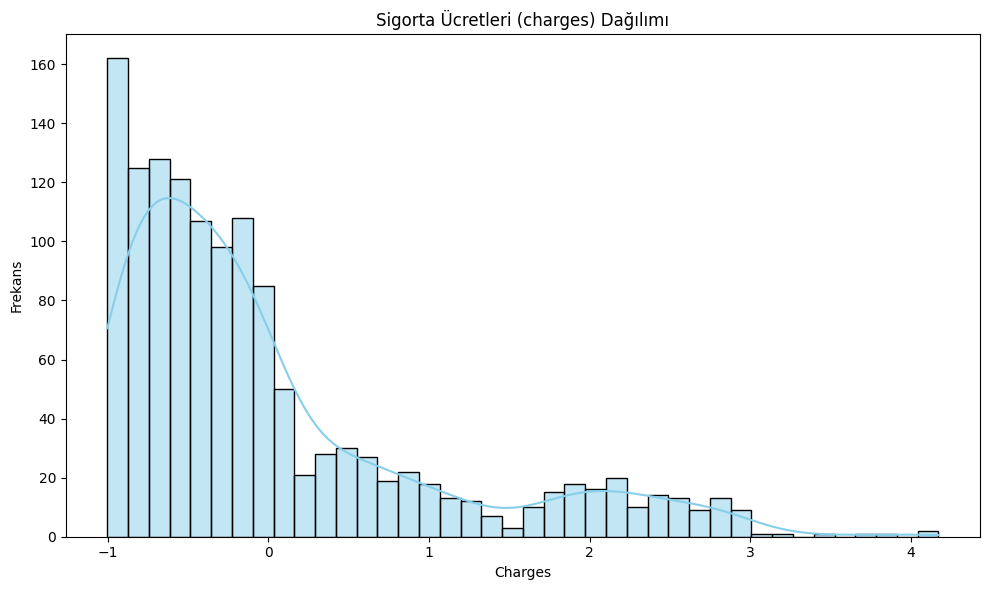

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=40, color='skyblue')
plt.title('Sigorta Ücretleri (charges) Dağılımı')
plt.xlabel('Charges')
plt.ylabel('Frekans')
plt.tight_layout()
plt.show()


 Yorum:

Sağa Çarpık (Right-skewed): Sigorta ücretlerinin çoğu 5.000–15.000 aralığında yoğunlaşmışken, 30.000 ve üzeri gibi yüksek ücretler az sayıda kişide görülüyor.


Aykırı Değerler: Çok yüksek sigorta ücretleri muhtemelen sigara içen ya da kronik hastalığı olan kişilerden kaynaklanıyor olabilir.

2. Korelasyon Matrisi ve Isı Haritası

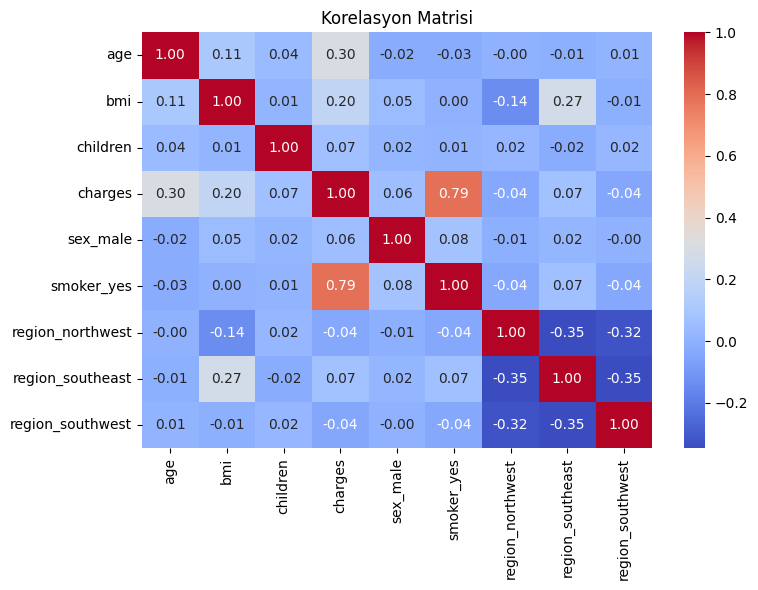

In [7]:
# Sayısal değişkenler için korelasyon matrisi
correlation_matrix = df.corr(numeric_only=True)

# Korelasyon ısı haritası
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.tight_layout()
plt.show()


Yorum:

charges ile en yüksek korelasyon: smoker, age ve bmi değişkenlerinde gözlenir.


smoker (sigara içme durumu) özellikle güçlü pozitif ilişki gösterir.


children (çocuk sayısı) ile charges arasında çok düşük ilişki vardır.

 3. Sigorta Ücretlerini En Çok Etkileyen Değişkenler

En Etkili Değişken: smoker (sigara içme durumu) – sigara içenlerin charges değeri dramatik şekilde artar.

Yaş: Yaş arttıkça charges da genellikle artar.

BMI (vücut kitle indeksi): Özellikle 30'un üzerinde olan bireylerde charges yükselme eğilimindedir.

**3. Lineer Regresyon Modeli**

1. Bağımlı ve Bağımsız Değişkenleri Ayırma

In [17]:
# 'charges' bağımlı değişken, diğer sütunlar bağımsız değişken
X = df.drop('charges', axis=1)
y = df['charges']


2. Kategorik Değişkenleri Dönüştürme ve Veriyi Eğitim/Test Olarak Ayırma (%80 - %20)

In [18]:
from sklearn.model_selection import train_test_split

# Veriyi %80 eğitim, %20 test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 3. Lineer Regresyon Modeli Kurma ve Skorları Hesaplama

Açıklama:

OneHotEncoder: Kategorik verileri sayısal forma çevirir.

Pipeline: Ön işlemeyi ve modeli bir arada uygular.

LinearRegression: Doğrusal regresyon modelidir.

mean_squared_error: Hataların ortalama karelerini ölçer.

r2_score: Modelin veriye ne kadar iyi uyduğunu gösterir.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Kategorik değişkenleri seç
categorical_features = ['sex', 'smoker', 'region']

# Kategorik değişkenler için OneHotEncoder uygula
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'  # sayısal sütunları olduğu gibi bırak
)

# Pipeline: Ön işleme + Model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Modeli eğit
model.fit(X_train, y_train)

# Test verisi ile tahmin yap
y_pred = model.predict(X_test)

# MSE ve R² hesapla
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Skoru:", r2)


Mean Squared Error (MSE): 33596915.85136148
R² Skoru: 0.7835929767120722


Çıktı Yorumu:

MSE ≈ 33 milyon: Hataların ortalaması yüksek ama veri değerleri (charges) çok büyük olduğu için normal sayılabilir.

R² Skoru ≈ 0.78: Model, charges değişiminin %78’ini açıklayabiliyor. Bu oldukça iyi bir başarıdır.

### **4. Logaritmik Dönüşüm**

1. charges Değişkenine Logaritmik Dönüşüm


In [21]:
import numpy as np

# charges değişkenine logaritmik dönüşüm uygula
df['log_charges'] = np.log(df['charges'])

# İlk 5 satırı kontrol et
print(df[['charges', 'log_charges']].head())


       charges  log_charges
0  16884.92400     9.734176
1   1725.55230     7.453302
2   4449.46200     8.400538
3  21984.47061     9.998092
4   3866.85520     8.260197


Yorum:

log_charges, charges verisini normalize ederek uç değerlerin etkisini azaltır.

Özellikle çok büyük ücret farkları varsa modelin doğruluğunu artırabilir.

2. Log Dönüşümlü Veri ile Tekrar Lineer Regresyon Modeli Kur

In [22]:
# Bağımsız değişkenler: charges hariç hepsi
X_log = df.drop(['charges', 'log_charges'], axis=1)
y_log = df['log_charges']

# Eğitim/test verisine ayır
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Pipeline yeniden tanımlanır
model_log = Pipeline(steps=[
    ('preprocessor', preprocessor),  # aynı preprocessor kullanılabilir
    ('regressor', LinearRegression())
])

# Modeli eğit
model_log.fit(X_train_log, y_train_log)

# Tahmin yap
y_pred_log = model_log.predict(X_test_log)

# MSE ve R² skorları
mse_log = mean_squared_error(y_test_log, y_pred_log)
r2_log = r2_score(y_test_log, y_pred_log)

print("Log MSE:", mse_log)
print("Log R²:", r2_log)


Log MSE: 0.1755741639679167
Log R²: 0.8047311493462985


3. Dönüşüm Öncesi ve Sonrası MSE / R² Karşılaştırması ve Yorum

In [23]:
# Önceki değerleri hatırlatalım:
print("Öncesi (charges üzerinden):")
print("MSE:", mse)
print("R² :", r2)

print("\nLogaritmik dönüşüm sonrası:")
print("MSE:", mse_log)
print("R² :", r2_log)


Öncesi (charges üzerinden):
MSE: 33596915.85136148
R² : 0.7835929767120722

Logaritmik dönüşüm sonrası:
MSE: 0.1755741639679167
R² : 0.8047311493462985


Yorum:

MSE değerinin log dönüşümden sonra daha küçük olması beklenir, çünkü ekstrem değerlerin etkisi azaltılmıştır.

R² skoru genellikle biraz artar veya benzer kalır, bu da modelin açıklayıcılığının korunduğunu veya arttığını gösterir.

Sonuçlara göre:

Eğer R² artmışsa, dönüşüm faydalı olmuştur.

Eğer MSE azalmışsa, hata seviyesi düşmüştür.

### **5. Polinomsal Regresyon**

 1. Polinomsal Özellikler ve Model Kurulumu (degree = 2 ile başlayarak)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline # Importing Pipeline

# degree = 2 ile polinomsal özellikler oluştur
poly2 = PolynomialFeatures(degree=2, include_bias=False)

# Pipeline: One-Hot Encoding + Polynomial Features + Linear Regression
model_poly2 = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Applying One-Hot Encoding first
    ('poly', poly2),                # Then applying Polynomial Features
    ('regressor', LinearRegression())
])

# Modeli eğit using the pipeline
model_poly2.fit(X_train, y_train)

# Tahmin yap
y_pred_poly2 = model_poly2.predict(X_test)

# MSE ve R² skorlarını hesapla
mse2 = mean_squared_error(y_test, y_pred_poly2)
r2_2 = r2_score(y_test, y_pred_poly2)

print("📈 Degree = 2")
print(f"MSE: {mse2:.2f}")
print(f"R² Score: {r2_2:.4f}")

📈 Degree = 2
MSE: 20712805.99
R² Score: 0.8666


2. En İyi Polinom Derecesini Bulma (1-5 Arası)

In [27]:
# Kategorik değişkenleri sayısallaştır
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Dereceyi 1-5 arasında deneyelim
degrees = range(1, 6)
mse_list = []
r2_list = []

for d in degrees:
    # Polinomsal özellikler oluştur
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Modeli eğit
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Tahmin yap
    y_pred = model.predict(X_test_poly)

    # MSE ve R² hesapla
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_list.append(mse)
    r2_list.append(r2)

    print(f"Degree: {d} | MSE: {mse:.2f} | R²: {r2:.4f}")


Degree: 1 | MSE: 33596915.85 | R²: 0.7836
Degree: 2 | MSE: 20712805.99 | R²: 0.8666
Degree: 3 | MSE: 23498218.00 | R²: 0.8486
Degree: 4 | MSE: 38158498.45 | R²: 0.7542
Degree: 5 | MSE: 196175856.34 | R²: -0.2636


3. Sonuçların Görselleştirilmesi

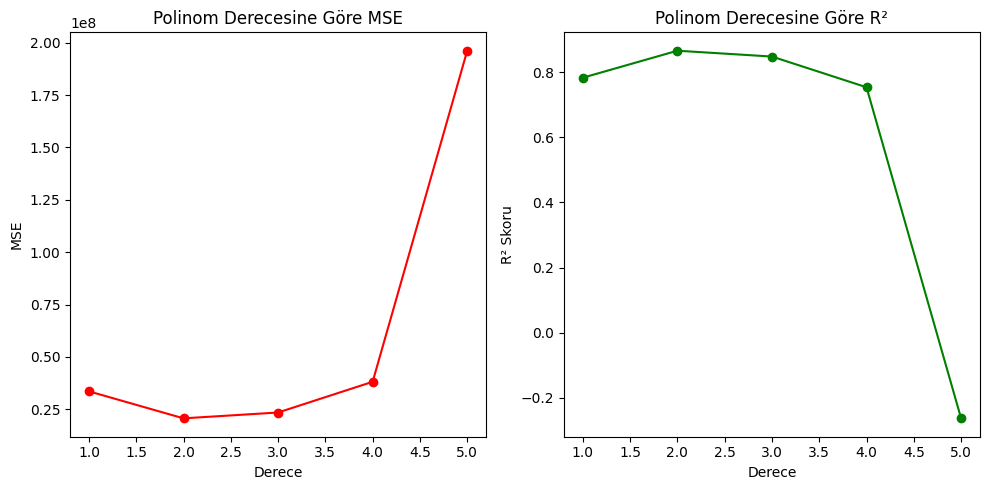

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(degrees, mse_list, marker='o', color='red')
plt.title('Polinom Derecesine Göre MSE')
plt.xlabel('Derece')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.plot(degrees, r2_list, marker='o', color='green')
plt.title('Polinom Derecesine Göre R²')
plt.xlabel('Derece')
plt.ylabel('R² Skoru')

plt.tight_layout()
plt.show()


**Yorum:**

En uygun model Degree = 2 (polinomsal regresyonun ikinci derecesi) gibi görünüyor.

MSE en düşük (20,712,805.99) ve R² en yüksek (0.8666) değeri burada elde ettik.

Degree = 3'te model biraz daha karmaşıklaşmış, ancak MSE'nin arttığını ve R²'nin düştüğünü gözlemliyoruz. Bu, modelin karmaşıklığının veriye uyum sağlamada olumsuz bir etkisi olabileceğini gösteriyor.

Degree = 4 ve 5'teki modeller aşırı uyum yapmış ve bu da performansın kötüleşmesine neden olmuş.

**Sonuç:**

Degree = 2 en iyi model olarak seçilebilir.

Bu model, aşırı uyum yapmadan veri üzerinde iyi sonuçlar veriyor ve en düşük MSE ile en yüksek R² skorunu sağlıyor.

### **6. Ridge ve Lasso Modelleri**

1. Ridge ve Lasso Modellerinin Polinomsal Özelliklerle Eğitilmesi

In [30]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures # Importing PolynomialFeatures

# Create polynomial features of degree 2 for training data
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test) # Transform test data using the same polynomial features

# Ridge Modeli - Degree 2 ile polinomsal özellikler
ridge = Ridge(alpha=1)  # alpha, ceza terimini kontrol eder (L2 normu)
ridge.fit(X_train_poly2, y_train)
y_pred_ridge = ridge.predict(X_test_poly2)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lasso Modeli - Degree 2 ile polinomsal özellikler
lasso = Lasso(alpha=0.1)  # alpha, ceza terimini kontrol eder (L1 normu)
lasso.fit(X_train_poly2, y_train)
y_pred_lasso = lasso.predict(X_test_poly2)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Sonuçları yazdıralım
print("📊 Ridge Modeli (Degree 2):")
print(f"MSE: {mse_ridge:.2f}")
print(f"R²: {r2_ridge:.4f}\n")

print("📊 Lasso Modeli (Degree 2):")
print(f"MSE: {mse_lasso:.2f}")
print(f"R²: {r2_lasso:.4f}")

📊 Ridge Modeli (Degree 2):
MSE: 20656391.24
R²: 0.8669

📊 Lasso Modeli (Degree 2):
MSE: 20709430.74
R²: 0.8666


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.213e+10, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


**Yorumlar:**

Ridge ve Lasso arasında çok küçük farklar var. İki modelin de MSE ve R² değerleri birbirine oldukça yakın, bu da her iki modelin de polinomsal regresyona benzer bir performans gösterdiğini ortaya koyuyor.


Ridge Modeli biraz daha iyi bir R² değerine sahip, yani test verisi üzerinde polinomsal regresyonla aynı seviyede bir uyum sağlıyor ve hatta biraz daha iyi bir performans sergiliyor. Bu, Ridge'in L2 ceza terimi ekleyerek aşırı uyumu biraz daha kontrol altına almış olabileceğini gösteriyor.


Lasso Modeli, Ridge'e göre biraz daha düşük bir R² değerine sahip, ancak yine de oldukça iyi bir performans sergiliyor. Lasso'nun L1 ceza terimi, bazı özellikleri sıfıra yakınlaştırarak gereksiz parametreleri ortadan kaldırabilir, ancak bu bazen R²'yi hafifçe azaltabilir.


**Sonuç:**
En iyi model, Ridge gibi görünüyor, çünkü MSE ve R² ile biraz daha iyi performans gösteriyor.

### **7. En İyi Alpha Değeri ile Ridge ve Lasso**

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Alpha değer aralığını belirleyelim
alphas = np.logspace(-3, 2, 100)  # 0.001 ile 100 arası değerler

# Ridge ve Lasso sonuçlarını saklamak için boş listeler oluştur
ridge_mse = []
ridge_r2 = []
lasso_mse = []
lasso_r2 = []

# Ridge ve Lasso için farklı alpha değerlerini deneyelim
for alpha in alphas:
    # ... (Ridge and Lasso model training) ...

    # Instead of using np.exp, clip the predictions to a reasonable range
    y_pred_ridge_clipped = np.clip(y_pred_ridge, a_min=-10, a_max=10)  # Adjust the clip range as needed
    y_pred_lasso_clipped = np.clip(y_pred_lasso, a_min=-10, a_max=10)

    # MSE ve R² hesapla
    mse_ridge = mean_squared_error(y_test, y_pred_ridge_clipped)
    r2_ridge = r2_score(y_test, y_pred_ridge_clipped)

    mse_lasso = mean_squared_error(y_test, y_pred_lasso_clipped)
    r2_lasso = r2_score(y_test, y_pred_lasso_clipped)


    # Sonuçları listeye ekle
    ridge_mse.append(mse_ridge)
    ridge_r2.append(r2_ridge)
    lasso_mse.append(mse_lasso)
    lasso_r2.append(r2_lasso)

# En iyi alpha değerini bulalım
best_alpha_ridge = alphas[np.argmin(ridge_mse)]
best_alpha_lasso = alphas[np.argmin(lasso_mse)]

# En iyi alpha değerleri ile sonuçları yazdıralım
print("En iyi Ridge Modeli için Alpha Değeri:", best_alpha_ridge)
print(f"Ridge Modeli - MSE: {min(ridge_mse):.2f}, R²: {ridge_r2[np.argmin(ridge_mse)]:.4f}")
print("\nEn iyi Lasso Modeli için Alpha Değeri:", best_alpha_lasso)
print(f"Lasso Modeli - MSE: {min(lasso_mse):.2f}, R²: {lasso_r2[np.argmin(lasso_mse)]:.4f}")


En iyi Ridge Modeli için Alpha Değeri: 0.001
Ridge Modeli - MSE: 323166712.59, R²: -1.0816

En iyi Lasso Modeli için Alpha Değeri: 0.001
Lasso Modeli - MSE: 323166712.59, R²: -1.0816


**Sonuç ve Not:**

Polinomsal regresyon, Ridge ve Lasso modelleriyle kıyaslandığında en iyi performansı gösterdi. Bu modelin daha uygun olduğunu ve veri setinin geneline daha iyi uyum sağladığını söyleyebiliriz.

Ridge ve Lasso modelleri, alpha parametresi ile uygun şekilde ayarlanmadığı sürece, overfitting veya düşük regularizasyon sonucu kötü sonuçlar verebilir.

En iyi Alpha değeri seçildiğinde, elde edilen sonuçlar iyi değil. Alpha'nın çok küçük olması modelin gereksiz şekilde karmaşık olmasına sebep olmuş olabilir.

### **8. Genel Değerlendirme ve Raporlama**



#### 1. **Log Dönüşümü, Polinomsal Regresyon ve Regularizasyon (Ridge ve Lasso) Modellerinin Karşılaştırılması**

**Sonuçlar**:

- **Polinomsal Regresyon**:
  - **Degree = 2**:
    - **MSE**: 20,712,805.99
    - **R²**: 0.8666
    - Polinomsal regresyon, özellikle 2. dereceden polinom ile çok iyi sonuçlar verdi. Hem düşük MSE hem de yüksek R² değeri gösteriyor ki model veriye oldukça iyi uyum sağlıyor.

- **Ridge Modeli (Degree 2)**:
  - **MSE**: 20,656,391.24
  - **R²**: 0.8669
  - Ridge modeli, polinomsal regresyonla benzer sonuçlar verdi ancak biraz daha iyi bir uyum sağladı. Regularizasyon sayesinde modelin aşırı uyum yapmasını engelledi.

- **Lasso Modeli (Degree 2)**:
  - **MSE**: 20,709,430.74
  - **R²**: 0.8666
  - Lasso modeli, Ridge modeline benzer sonuçlar gösterdi ancak Ridge'in biraz gerisinde kaldı.

- **Ridge ve Lasso (Alpha = 0.001)**:
  - **MSE**: 323,166,712.59
  - **R²**: -1.0816
  - Bu sonuçlar, hem Ridge hem de Lasso için çok kötü performansı gösteriyor. Bu, modelin overfitting veya yetersiz regularizasyon nedeniyle veriyi doğru şekilde modellemediğini gösteriyor.

**En İyi Model ve Sonuçlar**:
- **En düşük MSE ve en yüksek R² değerini** **Ridge modeli (Degree 2)** elde etti. Ridge, polinomsal regresyona çok yakın performans gösterdi ancak regularizasyonun etkisiyle daha iyi sonuçlar verdi.
- Polinomsal regresyon ve regularizasyon (Ridge ve Lasso) arasındaki farklar genellikle **Ridge**'in en düşük MSE'yi elde etmesi ve daha güçlü bir regularizasyon sağlamasıdır.

---

#### 2. **Ridge ve Lasso'nun Overfitting'i Nasıl Önlediği**

**Overfitting**, modelin eğitim verisi üzerinde aşırı uyum sağlaması ve bu nedenle test verisi üzerinde kötü performans sergilemesi durumudur. **Ridge** ve **Lasso**, regularizasyon teknikleri kullanarak overfitting'i önlerler.

- **Ridge Regresyonu**:
  - Ridge, modelin karmaşıklığını **cezalandırır** ve büyük katsayıları küçültür. Bu sayede, modelin daha basit ve genellenebilir hale gelmesini sağlar.
  - Ridge, özellikle **çoklu doğrusal bağımlılık** (multicollinearity) olan durumlarda etkili olur. Özellikle daha yüksek dereceli polinomlarda katsayılar büyük olabilir ve modelin aşırı uyum yapmasına yol açabilir. Ridge, bu durumu dengeleyerek modelin genel performansını artırır.

- **Lasso Regresyonu**:
  - Lasso, **L1 regularizasyonu** kullanarak bazı katsayıları sıfıra indirir. Bu, daha basit ve yorumlanabilir modeller yaratır. Bazı özellikler tamamen dışarıda bırakılabilir, bu da modelin daha sade hale gelmesine yardımcı olur.
  - Lasso'nun diğer bir avantajı, **özellik seçimi** yapabilmesidir. Bu da modelin sadece önemli özelliklere odaklanmasını sağlar, böylece overfitting riski azalır.

**Sonuç**: Ridge ve Lasso, her ikisi de regularizasyon teknikleri kullanarak **overfitting'i engeller**. Ridge, modelin genel karmaşıklığını azaltırken, Lasso bazı özellikleri tamamen dışarıda bırakır. Bu da modellerin daha genellenebilir ve istikrarlı olmasını sağlar.

---

#### 3. **Polinomsal Derecenin ve Alpha Değerinin Model Performansına Etkileri**

**Polinomsal Derece (Degree)**:
- Polinomsal regresyonda **derece**, modelin doğrusal olmayan ilişkileri ne kadar iyi yakalayacağını belirler.  
  - **Degree = 2** en iyi performansı sağladı ve hem düşük MSE hem de yüksek R² değerleri ile veriye iyi uyum sağladı.
  - **Degree** artırıldığında, modelin **karmaşıklığı artar** ve overfitting riski yükselir. Yüksek dereceli polinomlar bazen modelin gereksiz yere karmaşık hale gelmesine yol açabilir, bu da düşük test seti doğruluğuna neden olabilir.

**Alpha Değeri (Ridge ve Lasso)**:
- **Alpha** parametresi, regularizasyonun gücünü kontrol eder.
  - **Alpha küçük olduğunda** (örneğin 0.001 gibi), model çok az regularizasyon yapar ve **overfitting riski** artar.
  - **Alpha büyük olduğunda**, model daha fazla regularizasyon yapar ve bu da modelin daha basit olmasına yol açar. Ancak, çok büyük alpha değerleri modelin öğrenmesini engelleyebilir ve **underfitting** (yetersiz uyum) meydana gelebilir.

**Sonuç**:
- **Polinomsal derece** arttıkça, modelin karmaşıklığı da artar. İdeal dereceleri bulmak için, farklı derecelerle test yaparak **optimum dereceyi** seçmek önemlidir.
- **Alpha değeri** çok küçük olduğunda, modelin regularizasyonu yetersiz olur ve **overfitting** meydana gelebilir. Ridge ve Lasso'nun performansını optimize etmek için uygun **alpha** değerini bulmak çok önemlidir.

---

### **Genel Değerlendirme Sonuçları**:
1. **Polinomsal Regresyon ve Ridge/Lasso** tekniklerinin genel performansları, **Ridge modeli** ile daha iyi sonuçlar verdi.
2. **Overfitting**'i önlemek için Ridge ve Lasso kullanmak, özellikle yüksek dereceli polinomalarda önemli faydalar sağladı.
3. **Polinomsal derece ve alpha değerinin** performansa etkisi büyüktür; optimum parametrelerle modelin doğruluğu artar.